<a href="https://colab.research.google.com/github/EliasParada/Programacion_Computacional_III/blob/AI_fashion_mnist/AI_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar Librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as dts

In [ ]:
#Importar fashion_mnist
dataset, metedata = dts.load('fashion_mnist', as_supervised=True, with_info=True)
dataTrain, dataTest = dataset['train'], dataset['test']

In [ ]:
#Crear las etiquetas
tags = ["Camiseta", "Pantalón", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]

In [ ]:
numTraint = metedata.splits["train"].num_examples
numTest = metedata.splits["test"].num_examples
print(numTraint, numTest)

60000 10000


In [ ]:
#Normalizar
def normalizar(imgs, lbls):
  imgs = tf.cast(imgs, tf.float32)
  imgs /= 255
  return imgs, lbls

In [ ]:
#Comprimir los datos
dataTrain = dataTrain.map(normalizar)
dataTest = dataTest.map(normalizar)

In [ ]:
#Crear la red neuronal
model = tf.keras.Sequential([
                                       tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                       tf.keras.layers.Dense(80, activation=tf.nn.relu),
                                       tf.keras.layers.Dense(80, activation=tf.nn.relu),
                                       tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Compilar
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
#Randomizar la entrada de datos
batchsize = 32
dataTrain = dataTrain.repeat().shuffle(numTraint).batch(batchsize)
dataTest = dataTest.repeat().shuffle(numTest).batch(batchsize)

In [ ]:
#Entrenar el modelo
model.fit(dataTrain, epochs=10, steps_per_epoch=math.ceil(numTraint/batchsize), verbose=2)

Epoch 1/10
1875/1875 - 12s - loss: 0.5033 - accuracy: 0.8207
Epoch 2/10
1875/1875 - 6s - loss: 0.3713 - accuracy: 0.8644
Epoch 3/10
1875/1875 - 6s - loss: 0.3386 - accuracy: 0.8756
Epoch 4/10
1875/1875 - 6s - loss: 0.3118 - accuracy: 0.8830
Epoch 5/10
1875/1875 - 6s - loss: 0.3027 - accuracy: 0.8882
Epoch 6/10
1875/1875 - 6s - loss: 0.2824 - accuracy: 0.8958
Epoch 7/10
1875/1875 - 6s - loss: 0.2734 - accuracy: 0.8964
Epoch 8/10
1875/1875 - 6s - loss: 0.2648 - accuracy: 0.9006
Epoch 9/10
1875/1875 - 6s - loss: 0.2520 - accuracy: 0.9048
Epoch 10/10
1875/1875 - 6s - loss: 0.2454 - accuracy: 0.9069


In [ ]:
#Observar el margen de error
perFail, accuracy = model.evaluate(dataTest, steps=math.ceil(numTest/batchsize))
print("Falló por un ", perFail, ', y acerto por un', accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.3466 - accuracy: 0.8817
Falló por un  0.3465706706047058 , y acerto por un 0.8816893100738525


In [ ]:
#Graficar la imagen
def grafImg(prdArray, trueLabels, img):
  prdArray, trueLabels, img = prdArray[i], trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  lblPrd = np.argmax(prdArray)
  if lblPrd == trueLabels:
    color = "#068E00"
  else:
    color = "#A70000"
  
  plt.xlabel("Predict: {}".format(tags[lblPrd]), color=color)

In [ ]:
#Transformar imagenes en arrays
for imgTest, tagTest in dataTest.take(1):
  imgTest = imgTest.numpy()
  tagTest = tagTest.numpy()
  prd = model.predict(imgTest)

In [ ]:
#Graficar el margen de error y el acierto
def grafMatriz(subPlt, prdMatriz, trueTag):
  prdMatriz, trueTag = prdMatriz[i], trueTag[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.ylim([0,1])
  subPlt.set_facecolor("#B2FDAF")
  thisPlot = plt.bar(range(10), prdMatriz, color='#7C8C7C')
  prdTag = np.argmax(prdMatriz)

  thisPlot[prdTag].set_color("#A70000")
  thisPlot[trueTag].set_color("#068E00")

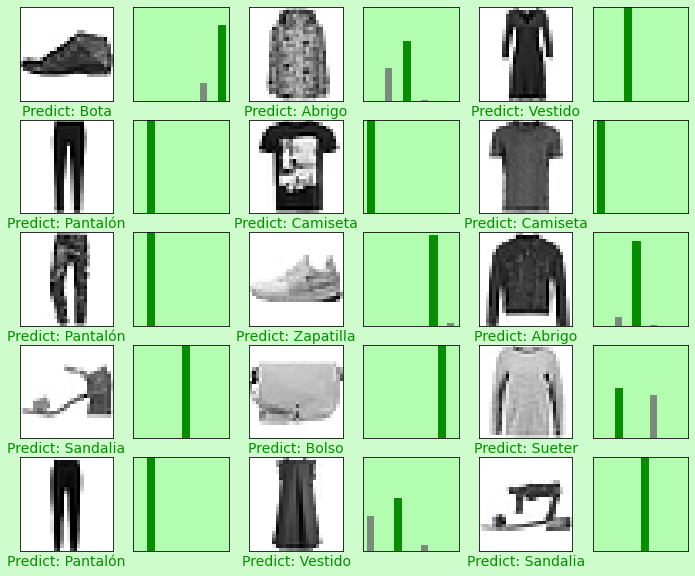

In [ ]:
rows = 5
columns = 3
numImg = rows*columns

plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(numImg):
  imgSubplt = plt.subplot(rows, 2*columns, 2*i+1)
  grafImg(prd, tagTest, imgTest)

  grafSubplt = plt.subplot(rows, 2*columns, 2*i+2)
  grafMatriz(grafSubplt, prd, tagTest)

plt.rcParams['figure.facecolor'] = '#CEFCCC'
plt.rcParams['font.size'] = 14
plt.show()

In [ ]:
import cv2
#Agregando imagen
imgLocal = cv2.imread('/content/shirt.png', 0)
imgLocal = tf.cast(imgLocal, tf.float32)
imgLocal = imgLocal / 255
imgLocal = np.expand_dims(imgLocal, axis=0)

print(imgLocal.shape)

(1, 28, 28)


In [ ]:
#Entrenar
prdLocal = model.predict(imgLocal, batch_size=1)
tagLocalTest = np.argmax(prdLocal)
print(prdLocal)

[[3.4057809e-04 1.3762834e-09 1.1340764e-03 1.2948565e-02 9.9750310e-02
  1.2809499e-05 8.8574815e-01 3.6392937e-12 6.5522079e-05 2.2342448e-08]]


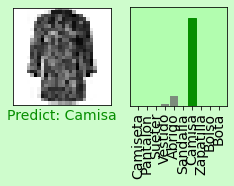

In [ ]:
#Imprimir
columns = 2
rows = 2

plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imgLocal[0,...], cmap=plt.cm.binary)
plt.xlabel("Predict: {}".format(tags[tagLocalTest]), color='#068E00')

grafLocalSubplt = plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), prdLocal[0], color='#7C8C7C')
plt.ylim([0,1])
grafLocalSubplt.set_facecolor("#B2FDAF")
thisplot[tagLocalTest].set_color("#A70000")
thisplot[tagLocalTest].set_color("#068E00")
plt.xticks(range(10), tags, rotation=90)

plt.rcParams['figure.facecolor'] = '#CEFCCC'
plt.rcParams['font.size'] = 14
plt.show()